# Try Mean squared error, phase cross correlation (phase shift), mutual information, and target registration error:
### All of these metrics in two different ways: ex. MSE for adjacent images (1 vs 2, 2 vs 3, etc) and MSE compared to the image of original reference (the middle image) (1  vs 17, 2 vs 17, etc).

### MSE: for each pixel, (ref_pixel-mov_pixel)^2

### PC offset from: https://docs.opencv.org/4.x/d7/df3/group__imgproc__motion.html#ga80e5c3de52f6bab3a7c1e60e89308e1b
### calculates detected phase correlation shift between two arrays.

### MI from: https://matthew-brett.github.io/teaching/mutual_information.html
### Calculates MI from equation MI = sum of joint probability(A,B) * log(joint probability(A,B)/marginal(A)*marginal(B))

### TRE from: http://insightsoftwareconsortium.github.io/SimpleITK-Notebooks/Python_html/68_Registration_Errors.html

In [17]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import cv2
from matplotlib import pyplot as plt

In [18]:
#local directory path: C:\Users\choke\Desktop\registered_images
#server path: \\fatherserverdw\Kevin\imageregistration\registered_images
img_files_path = [_ for _ in os.listdir(r'\\fatherserverdw\Kevin\imageregistration\registered_images') if _.endswith(".png")]
img_files_path_complete = [os.path.join(r'\\fatherserverdw\Kevin\imageregistration\registered_images', x) for x in img_files_path]
ref = int(len(img_files_path)/2) - 1 #idx = 16, or 17th image
# img_files_path[16] #'z0049_49C1.png' is the reference image

In [186]:
# MSE comparing adjacent:
from sklearn.metrics import mean_squared_error
mse_ra1 = []
for idx in range(len(img_files_path)-1):
    img_path_1 = img_files_path_complete[idx]
    img_path_2 = img_files_path_complete[idx+1]
    img1 = np.array(Image.open(img_path_1))
    img2 = np.array(Image.open(img_path_2))
    img1_flatten = img1.flatten()
    img2_flatten = img2.flatten()
    mse = mean_squared_error(img2_flatten,img1_flatten)
    mse_ra1.append(mse)
avg = sum(mse_ra1)/len(mse_ra1)
avg_mse1 = np.round(avg,2)
mse_ra1.append(None)
print("Averaged MSE for adjacent images is {}".format(avg_mse1))

Averaged MSE for adjacent images is 42.99


In [187]:
# MSE comparing to original reference image (one in the middle)
img_path_2 = img_files_path_complete[ref]
img2 = np.array(Image.open(img_path_2))
img2_flatten = img2.flatten()
mse_ra2 = []
for idx in range(len(img_files_path)):
    img_path_1 = img_files_path_complete[idx]
    img1 = np.array(Image.open(img_path_1))
    img1_flatten = img1.flatten()
    mse = mean_squared_error(img2_flatten,img1_flatten)
    mse_ra2.append(mse)
avg = sum(mse_ra2)/len(mse_ra2)
avg_mse2 = np.round(avg,2)
print("Averaged MSE comparing to original image is {}".format(avg_mse2))

Averaged MSE comparing to original image is 48.53


In [21]:
# PC offset comparing adjacent:
from cv2 import phaseCorrelate, cvtColor

pc_offset1 = []
response_ra1 = []
for idx in range(len(img_files_path)-1):
    img_path_1 = img_files_path_complete[idx]
    img_path_2 = img_files_path_complete[idx+1]
    img1 = np.array(cv2.imread(img_path_1)).astype('float32')
    img2 = np.array(cv2.imread(img_path_2)).astype('float32')
    img1_g = cvtColor(img1,cv2.COLOR_BGR2GRAY)
    img2_g = cvtColor(img2,cv2.COLOR_BGR2GRAY)
    pc_offset, response = phaseCorrelate(img1_g,img2_g)
    pc_offset1.append(pc_offset)
    response_ra1.append(response)
pc_offset1.append(None)


,Offset of X coordinates,Offset of Y coordinates
0,0.000725,0.000355
1,0.000497,-0.007285
2,-0.001321,-0.003940
3,-0.007351,-0.003856
4,-0.004477,-0.000644
5,-0.003643,-0.006591
6,-0.009836,-0.011409
7,-0.004966,-0.002093
8,-0.002840,-0.002198
9,-0.008562,-0.006010


In [127]:
df_pc1 = pd.DataFrame(pc_offset1)
df_pc1.columns = ["Offset of X coordinates","Offset of Y coordinates"]
df_pc1 = np.absolute(df_pc1)
df_pc1

,Offset of X coordinates,Offset of Y coordinates
0,0.000725,0.000355
1,0.000497,0.007285
2,0.001321,0.003940
3,0.007351,0.003856
4,0.004477,0.000644
5,0.003643,0.006591
6,0.009836,0.011409
7,0.004966,0.002093
8,0.002840,0.002198
9,0.008562,0.006010


In [22]:
# PC offset comparing to original reference image (one in the middle):
img_path_2 = img_files_path_complete[ref]
img2 = np.array(Image.open(img_path_2)).astype('float32')
img2_g = cvtColor(img2,cv2.COLOR_BGR2GRAY)

pc_offset2 = []
response_ra2 = []
for idx in range(len(img_files_path)):
    img_path_1 = img_files_path_complete[idx]
    img1 = np.array(cv2.imread(img_path_1)).astype('float32')
    img1_g = cvtColor(img1,cv2.COLOR_BGR2GRAY)
    pcc_shift, response = phaseCorrelate(img1_g,img2_g)
    pc_offset2.append(pcc_shift)
    response_ra2.append(response)

,Offset of X coordinates,Offset of Y coordinates
0,83.416607,-1024.230358
1,-22.878118,0.571115
2,122.387190,-344.587666
3,214.612963,-829.657196
4,-1304.137438,267.208091
5,0.020616,0.019489
6,-0.033221,0.895092
7,-0.941214,-0.219059
8,-0.006761,-0.013312
9,-0.054864,0.024502


In [128]:
df_pc2 = pd.DataFrame(pc_offset2)
df_pc2.columns = ["Offset of X coordinates","Offset of Y coordinates"]
df_pc2 = np.absolute(df_pc2)
df_pc2

,Offset of X coordinates,Offset of Y coordinates
0,83.416607,1024.230358
1,22.878118,0.571115
2,122.387190,344.587666
3,214.612963,829.657196
4,1304.137438,267.208091
5,0.020616,0.019489
6,0.033221,0.895092
7,0.941214,0.219059
8,0.006761,0.013312
9,0.054864,0.024502


In [23]:
# Function to calculate MI:

def calculate_mutual_information(img_path_1,img_path_2): #order doesn't matter, MI(A,B) = MI(B,A)
    img1 = np.array(cv2.imread(img_path_1))
    img2 = np.array(cv2.imread(img_path_2))
    img1_g = cvtColor(img1,cv2.COLOR_BGR2GRAY)
    img2_g = cvtColor(img2,cv2.COLOR_BGR2GRAY)
    # Image.fromarray(np.hstack((img1_g,img2_g))).show()
    # fig,axes = plt.subplots(1,2)
    # axes[0].hist(img1_g.ravel(), bins=20)
    # axes[0].set_title('Image 1 histogram')
    # axes[1].hist(img2_g.ravel(), bins=20)
    # axes[1].set_title('Image 2 histogram')
    # plt.show()
    corr = np.corrcoef(img1_g.ravel(),img2_g.ravel())[0,1]
    hist2d, x_edges, y_edges = np.histogram2d(img1_g.ravel(),img2_g.ravel(),bins=20)
    # plt.imshow(hist2d.T,origin='lower',cmap = "gray")
    # plt.xlabel('image1 signal bin')
    # plt.ylabel('image2 signal bin')
    # plt.title('2D Histogram between Image1 and Image2 with Cross Correlation Coefficient = {}'.format(corr))
    pxy = hist2d / float(np.sum(hist2d))
    px = np.sum(pxy, axis=1)  # marginal x over y
    py = np.sum(pxy, axis=0)  # marginal y over x
    px_py = px[:, None] * py[None, :]  # broadcast to multiply marginals

    # now we can do the calculation using the pxy, px_py 2D arrays
    nonzeros = pxy > 0  # filer out the zero values
    mi = np.sum(pxy[nonzeros] * np.log(pxy[nonzeros] / px_py[nonzeros]))
    return mi

In [24]:
# MI for adjacent:
mi_ra1 = []
for idx in range(len(img_files_path)-1):
    img_path_1 = img_files_path_complete[idx]
    img_path_2 = img_files_path_complete[idx+1]
    mi = calculate_mutual_information(img_path_1,img_path_2)
    mi_ra1.append(mi)
mi_ra1.append(None)
print(mi_ra1)

[0.4849058314273125, 0.4162245967115682, 0.4321459057960573, 0.3663964914181318, 0.39283773082134227, 0.45622415960382073, 0.5830679398485484, 0.5769726495312383, 0.6343945106850402, 0.6189047776573369, 0.5896230332274913, 0.6019591257643095, 0.5994669954094823, 0.6036054816484573, 0.5390411701038564, 0.6018389780698216, 0.5864717706499663, 0.6313456680768316, 0.6167513410742206, 0.6167358382125928, 0.6246650053383919, 0.617783722684791, 0.6474665083469834, 0.6340809840068675, 0.6195376110145135, 0.6531493243339365, 0.6938635882447781, 0.7017938455432782, 0.7190972054973411, 0.6791819720686404, 0.6993394359130259, 0.7525253232108031, 0.8040443077654922, None]


In [25]:
# MI comparing to original reference image:
img_path_2 = img_files_path_complete[ref]
mi_ra2 = []

for idx in range(len(img_files_path)):
    img_path_1 = img_files_path_complete[idx]
    mi = calculate_mutual_information(img_path_1,img_path_2)
    mi_ra2.append(mi)
print(mi_ra2)

[0.1764039393399049, 0.18352899248705767, 0.22781912866566953, 0.16392509779397826, 0.2449892051530869, 0.27517141753061486, 0.3766921772703031, 0.37212039628091165, 0.40006546257798925, 0.4027943086333005, 0.3980786291937331, 0.3910443103471421, 0.3869716770606927, 0.41493285091482823, 0.42689039898613823, 0.6018389780698216, 1.6528426580660232, 0.5864717706499663, 0.4828867039494923, 0.4785494237460075, 0.4528766333169171, 0.44194652567391957, 0.44282225135305353, 0.4360626540214203, 0.42770465077607955, 0.3863985481019138, 0.40120439929595114, 0.3976896405966903, 0.39846168365586043, 0.3887286138013822, 0.3717220540399554, 0.324917839245309, 0.3133268495115286, 0.3112174470906934]


In [105]:
mi_ra2[ref]

1.6528426580660232

In [129]:
#first concatenate all the arrays of the data and make them into a dataframe:
score_df = pd.DataFrame()
score_df["MSE adjacent"] = mse_ra1
score_df["MSE original"] = mse_ra2

df_pc1['mean'] = df_pc1.mean(axis=1)
df_pc1 = df_pc1.drop(columns=["Offset of X coordinates","Offset of Y coordinates"])
df_pc2['mean'] = df_pc2.mean(axis=1)
df_pc2 = df_pc2.drop(columns=["Offset of X coordinates","Offset of Y coordinates"])

score_df["PC mean offest adjacent"] = df_pc1 #average the X and Y offsets:
score_df["PC mean offset original"] = df_pc2
score_df["MI adjacent"] = mi_ra1
score_df["MI original"] = mi_ra2

import re
z_list = [re.findall("\d+",x)[0] for x in img_files_path]
z_values = [x.lstrip("0") for x in z_list]
score_df["z-values"] = z_values
score_df = score_df.set_index('z-values')
score_df = score_df.drop(labels='49',axis=0) #drop the reference image so that it doesn't screw up the normalization

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_score_df = scaler.fit_transform(X=score_df,y=None)
scaled_score_df = pd.DataFrame(scaled_score_df, columns = score_df.columns, index = score_df.index)

#assign row names


In [130]:
scaled_score_df

,MSE adjacent,MSE original,PC mean offest adjacent,PC mean offset original,MI adjacent,MI original
z-values,,,,,,
1,0.374454,0.918665,0.000000,7.049031e-01,0.270787,0.028496
4,0.578564,0.942191,0.332378,1.492158e-02,0.113854,0.044767
7,0.629171,0.852476,0.207308,2.971805e-01,0.150234,0.145905
10,1.000000,0.957447,0.502238,6.645702e-01,0.000000,0.000000
13,0.870527,1.000000,0.200369,1.000000e+00,0.060417,0.185114
16,0.365298,0.468738,0.453951,2.404825e-05,0.205251,0.254037
19,0.183386,0.275882,1.000000,5.893029e-04,0.495082,0.485865
22,0.205047,0.285199,0.296507,7.369210e-04,0.481154,0.475425
25,0.106245,0.213515,0.196268,1.130010e-05,0.612360,0.539239


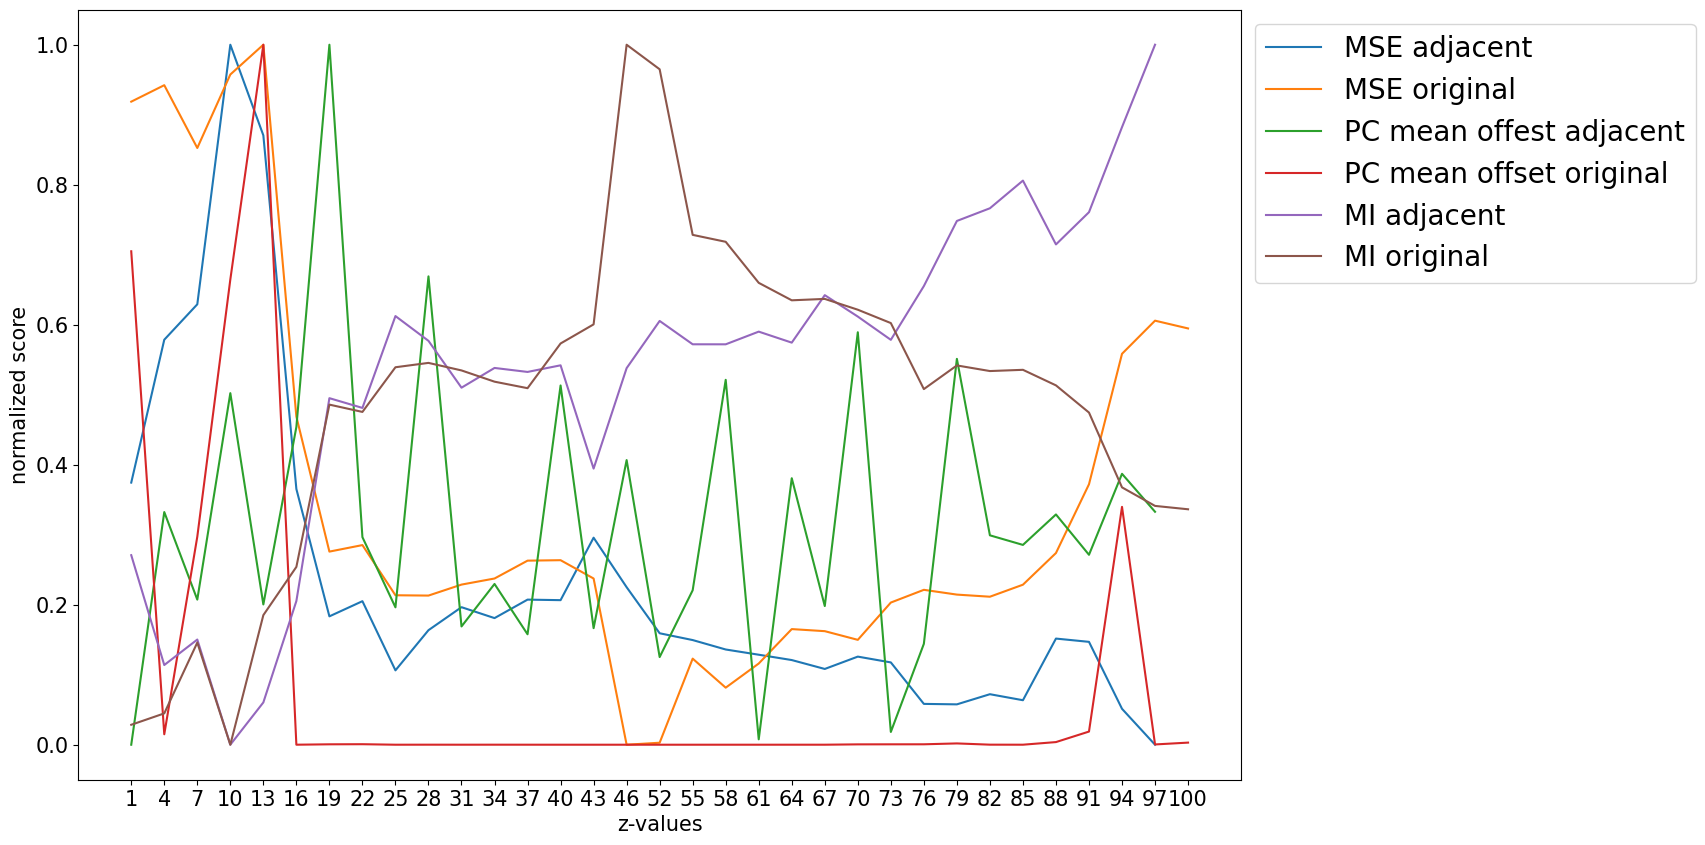

In [131]:
# then use sns.lineplot to plot all of these values, and their average in the same plot:
import seaborn as sns
fig = plt.figure(figsize=(15,10))
sns.lineplot(data=scaled_score_df,dashes = False)
plt.ylabel('normalized score',fontsize=15)
plt.xlabel('z-values',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='best',bbox_to_anchor=(1, 1),fontsize = 20)

# fig.savefig(r'\\fatherserverdw\Kevin\imageregistration\score_figure.jpg',bbox_inches='tight')

### Make three plots: MSE, PC, MI, min-max normalization together (adjacent and original) (two lines in one plot)
### Make two more plots (normalize by its own value) of adjacent vs original (three lines in one plot)

In [ ]:
mse_ra1 = [i for i in mse_ra1 if i is not None]
del mse_ra2[ref]
# max_val = np.max(np.maximum(mse_ra1,mse_ra2))
# min_val = np.min(np.minimum(mse_ra1,mse_ra2))

In [ ]:
def MinMaxScaler(x):
    return [round((i - min(x)) / (max(x) - min(x)), 2) for i in x]

In [199]:
#join mse_ra1 and mse_ra2 as one array and apply normalize